Набор данных о рыбном рынке представляет собой набор данных, относящихся к различным видам рыб и их характеристикам (Fish.csv).
Вот описание каждого столбца в наборе данных:

Species(Вид): В этом столбце представлен вид рыбы. Это категориальная переменная, которая относит каждую рыбу к одному из семи видов. Этот вид может включать такие названия, как "Окунь", "Лещ", "Плотва", "Щука", "Корюшка", "Паркки" и "Сиг" (Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish."). Этот столбец является целевой переменной для полиномиального регрессионного анализа, в котором мы стремимся предсказать вес рыбы на основе других ее характеристик.

Weight(Вес): В этом столбце представлен вес рыбы. Это числовая переменная, которая обычно измеряется в граммах. Вес - это зависимая переменная, которую мы хотим предсказать с помощью полиномиальной регрессии.

Length1(Длина 1): Этот столбец представляет собой первое измерение длины рыбы. Это числовая переменная, обычно измеряемая в сантиметрах.

Length2(Длина 2): Этот столбец представляет собой второе измерение длины рыбы. Это еще одна числовая переменная, обычно измеряемая в сантиметрах.

Length3(Длина 3): Этот столбец представляет собой третье измерение длины рыбы. Как и в предыдущих двух столбцах, это числовая переменная, обычно измеряемая в сантиметрах.

Height(Высота): в этом столбце представлен рост рыбы. Это числовая переменная, обычно измеряемая в сантиметрах.

Width(Ширина): В этом столбце представлена ширина рыбы. Как и другие числовые переменные, он также обычно измеряется в сантиметрах.

Набор данных структурирован таким образом, что каждая строка соответствует отдельной рыбе с указанием ее вида и различных физических параметров (длины, высоты и ширины). Целью использования полиномиальной регрессии в этом наборе данных было бы построение прогнозирующей модели, которая могла бы оценить вес рыбы на основе ее вида и предоставленных физических измерений.

Загрузка данных...
Данные загружены. Размер: (159, 7)
Пропущенные значения:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Типы данных:
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object
Предобработка данных...

Удаление выбросов...
Границы выбросов для Weight: [-675.00, 1445.00]
Обнаружено выбросов: 3
Удалено 3 выбросов (1.9%)

Создание новых признаков...
Созданы новые признаки: Volume, Length_Ratio, Height_Width_Ratio, Size_Index, Density

Логарифмирование целевой переменной...
Используемые числовые признаки: ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volume', 'Length_Ratio', 'Height_Width_Ratio', 'Size_Index', 'Density']

Разделение данных на train/test...
Размер train: 124, test: 32

Обучение моделей...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Оценка моделей на тестовых данных...
Linear Regression R

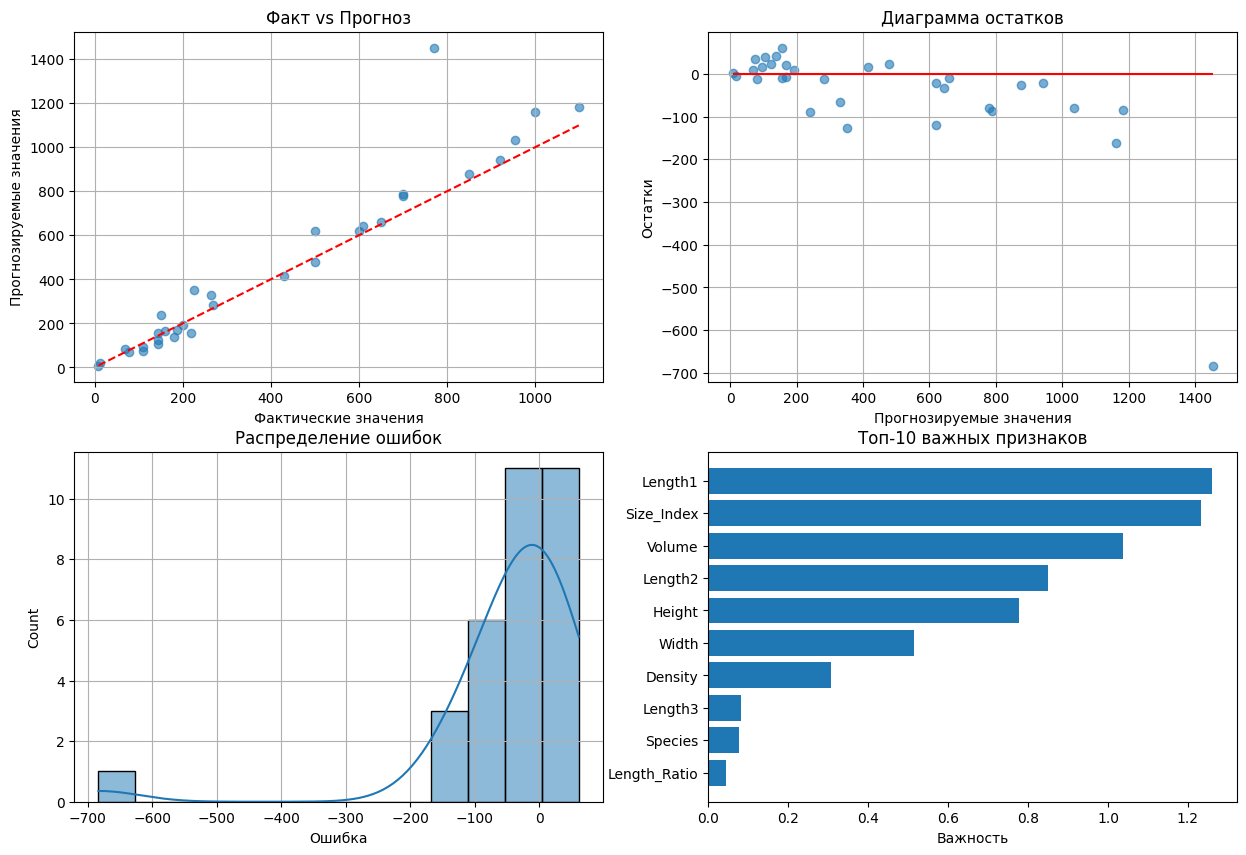

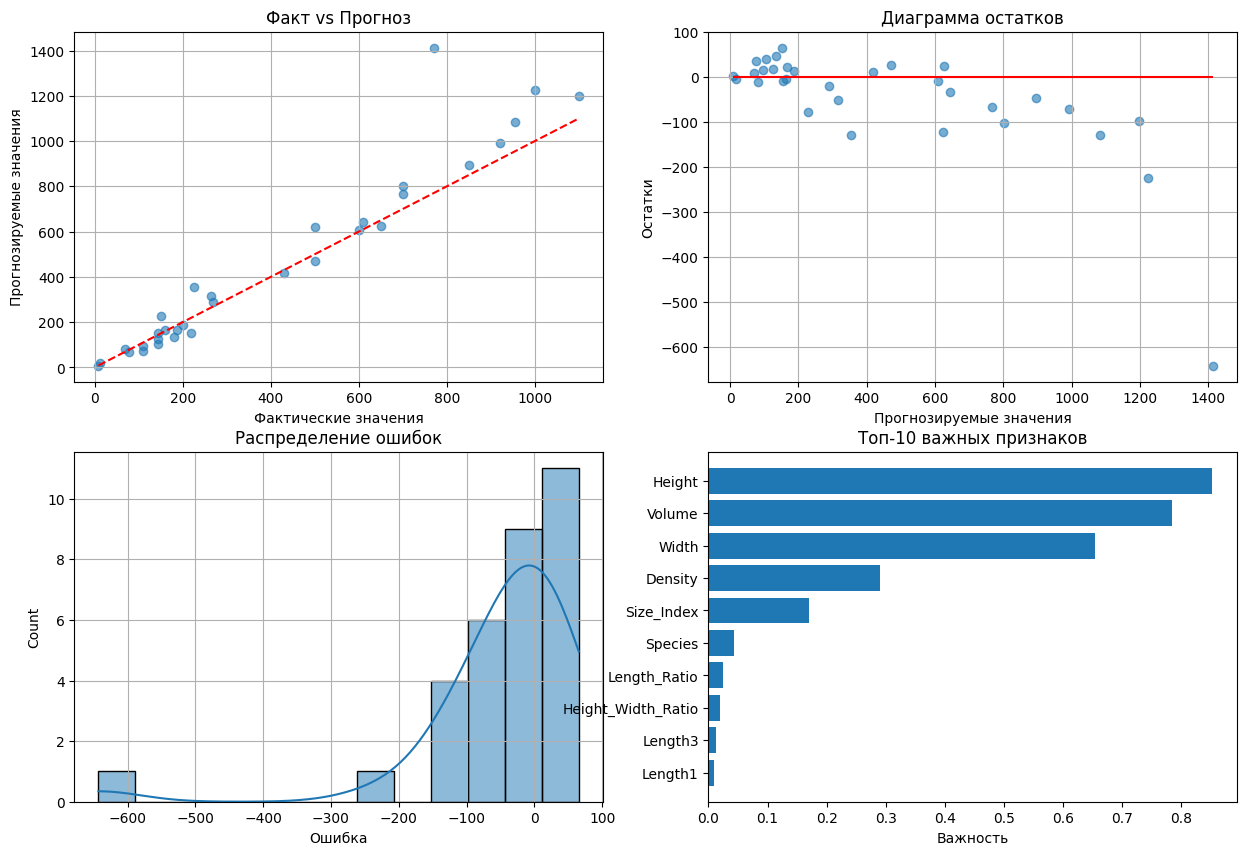

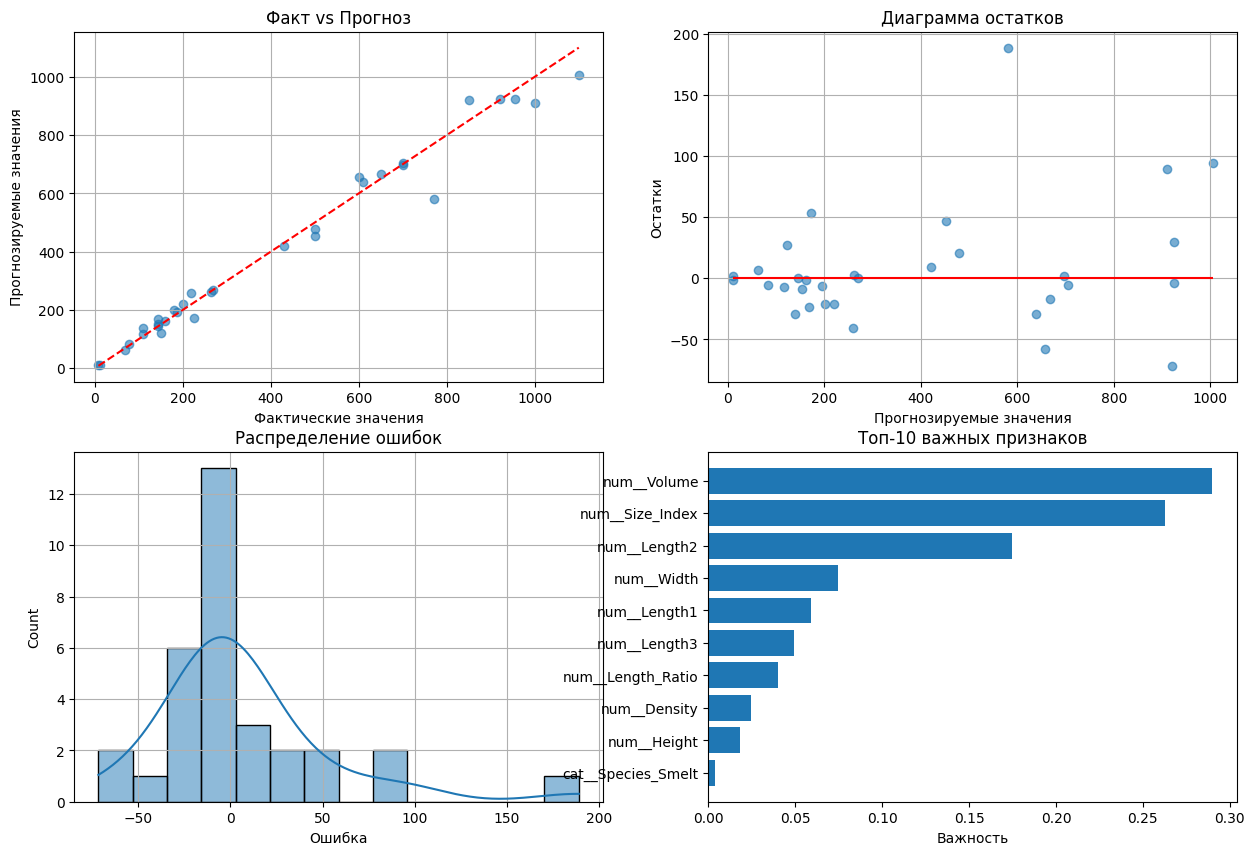

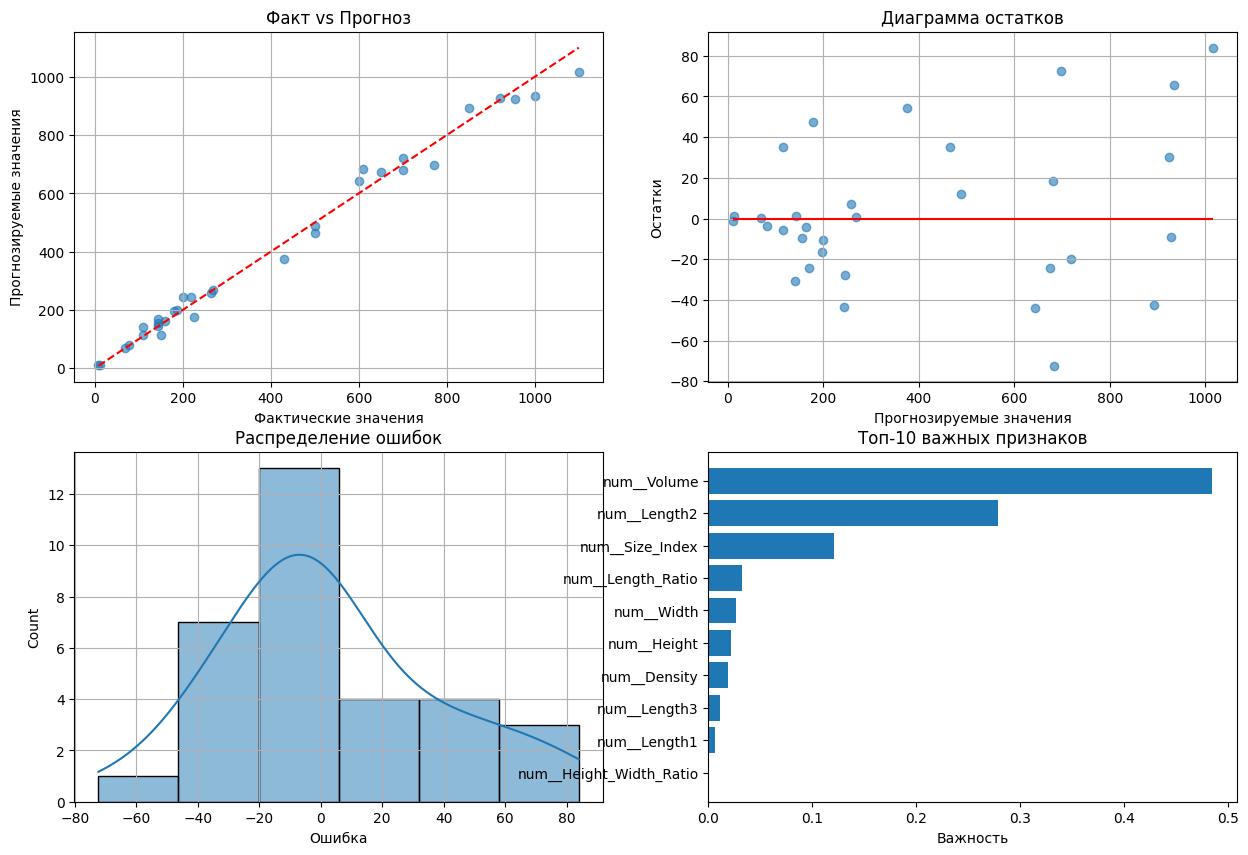

In [1]:
import joblib
import numpy as np # Добавлен недостающий импорт
from data_processing import load_data, preprocess_data
from model_training import train_models, save_best_model
from evaluation import evaluate_model
from config import *

def main():
    # Загрузка и обработка данных
    print("Загрузка данных...")
    df = load_data()

    print("Предобработка данных...")
    X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df)

    # Обучение моделей
    print("\nОбучение моделей...")
    models = train_models(X_train, y_train, preprocessor)

    # Выбор и сохранение лучшей модели
    print("\nОценка моделей на тестовых данных...")
    best_model = save_best_model(models, X_test, y_test)

    # Детальная оценка всех моделей
    print("\nДетальная оценка моделей...")
    for model, name in models:
        print(f"\nОценка модели: {name}")
        evaluate_model(model, X_test, y_test, name)

    # Загрузка и использование лучшей модели
    print("\nДемонстрация работы лучшей модели...")
    loaded_model = joblib.load(MODEL_SAVE_PATH)
    sample = X_test.sample(1, random_state=RANDOM_STATE)
    prediction = np.expm1(loaded_model.predict(sample))
    actual = np.expm1(y_test.loc[sample.index])
    print(f"\nПрогноз для образца: {prediction[0]:.2f}")
    print(f"Фактическое значение: {actual.values[0]:.2f}")
    print(f"Ошибка: {abs(prediction[0] - actual.values[0]):.2f} (%")
    print(f"Относительная ошибка: {abs(prediction[0] - actual.values[0])/actual.values[0]*100:.1f}%)")
if __name__ == "__main__":
    main()